# Full Integration benchmarking - Extended data 1e

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scib

from scib_metrics.benchmark import Benchmarker

%matplotlib inline

sc.logging.print_header()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val == getattr(num

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.10.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.11.2 louvain==0.7.0 leidenalg==0.8.3


In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/scib_benchmarking/pooled_healthy.gene_cellbender.good_qc_cluster_mito80.doublet_flagged.20220909.finalannot_unintegrated.scib20231108.h5ad')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
adata

AnnData object with n_obs × n_vars = 1246039 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [4]:
adata.X.max()

40699.0

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [8]:
adata.X.max()

9.205416

In [9]:
adata_hvg = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/models/scvi_output20230126/pooled_healthy.hvg7500_noCC.nodoublets.scvi_output.20230126-ad1.h5ad')

In [10]:
adata

AnnData object with n_obs × n_vars = 1246039 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [11]:
adata = adata[:, adata.var_names.isin(adata_hvg.var_names)].copy()

In [12]:
unint = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/unintegrated.csv.gz',index_col=0,compression='gzip')

In [13]:
unint

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV21,LV22,LV23,LV24,LV25,LV26,LV27,LV28,LV29,LV30
index,,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,-182.96869,-47.552640,-30.361849,-86.451355,-10.052686,-1.993873,102.965900,-5.622176,-8.244520,-1.752428,...,0.219891,0.998356,0.031920,-0.521571,-1.025180,0.186886,0.355182,-0.213925,0.859672,1.772676
AAACGCTAGCGACCCT-GSM4600896,-182.84976,-43.836197,-34.669106,-89.134865,-8.748613,-1.450106,-59.118107,-9.806281,-9.260619,-0.294029,...,-0.235594,0.638029,-0.348240,-0.884232,-1.446523,0.255065,0.149071,-0.707706,0.176229,1.117361
AAAGAACAGCGACCCT-GSM4600896,-178.08093,-47.589940,-31.784931,-85.421280,-10.074421,-2.157575,21.534353,-6.445819,-8.775234,-1.505281,...,0.224759,-1.546647,0.216562,-0.410538,-0.868397,0.165349,0.366795,-0.239982,0.784024,1.784906
AAAGGGCAGTCACACT-GSM4600896,-183.45810,-43.165226,-34.776646,-96.077580,-8.686465,-1.419293,-61.866380,-10.037341,-8.973084,-2.726282,...,0.180899,9.866103,-0.581228,-1.152101,-1.787535,0.265516,0.164183,-0.721993,0.245110,1.015178
AAAGGGCCAACACAGG-GSM4600896,-185.80653,-49.533900,23.497843,-84.675410,-9.726339,-0.850622,143.965130,-5.149932,-6.887855,-0.716414,...,0.106810,-17.430977,1.668857,0.808121,1.002741,0.184888,1.132438,0.975853,2.939465,9.517002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-180.63213,-42.783660,-35.854633,-95.038500,-8.466398,-1.319353,-104.339455,-11.163742,-9.318233,-2.229096,...,0.155279,8.021516,-0.486353,-1.100075,-1.779192,0.300239,0.195493,-0.770612,0.270406,1.287815
TTTGTCAAGATAGGAG-GSM5525958,3630.21580,-17.392937,-8.384179,-24.521210,144.836930,125.224144,-45.472690,-352.359200,220.834320,-1.381596,...,-87.502820,1.039909,-19.364557,36.142980,200.578020,-90.199936,-57.966560,133.235890,-72.997090,-544.119750
TTTGTCAAGTAGGCCA-GSM5525958,3097.60130,-510.070900,-31.482170,-46.851340,-108.642100,-45.739067,-12.626889,38.629784,-23.232670,-1.580424,...,14.320402,6.970740,17.813690,16.617462,37.312330,-16.621407,-5.198505,19.154730,-9.719718,-64.501240


In [14]:
scvi_int = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/scVI.csv.gz',index_col=0,compression='gzip')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
scvi_int

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,1.485709,0.139740,0.788691,0.006428,-0.449599,0.035644,1.488679,-0.029249,1.661317,0.344493,1.364612,-1.180276,-1.295085,-1.678798,0.005166,-1.269441,0.037849,-0.054872,-0.659535,-0.028524
AAACGCTAGCGACCCT-GSM4600896,-0.876173,-1.174195,-1.999712,0.027764,1.216232,0.004400,-0.010934,-0.067665,1.575182,-0.321202,-0.617129,-2.173305,-0.939770,1.295961,-0.034061,-0.007191,0.029218,0.169127,-1.530224,-0.001530
AAAGAACAGCGACCCT-GSM4600896,0.306341,-1.860595,1.364353,0.020180,0.024140,0.035121,0.173966,-0.010754,1.154424,0.272679,1.233574,-2.182591,-1.335822,-1.670801,0.037005,-1.335630,0.019691,-0.325471,-0.473762,-0.006091
AAAGGGCAGTCACACT-GSM4600896,-1.048534,-0.382853,-1.154650,0.009045,1.320448,-0.001983,0.886629,-0.066898,1.162265,-0.132742,-0.425517,-2.223906,-0.925352,1.518832,-0.028744,-1.296824,0.041518,-0.117163,-1.429552,-0.023197
AAAGGGCCAACACAGG-GSM4600896,0.842679,-0.533378,-1.099758,0.026912,-3.413429,0.043136,1.594899,-0.018520,1.628954,-0.185940,-0.307772,-2.353421,-2.344352,-0.089459,-0.026076,0.845680,0.079013,-0.479581,0.901874,-0.049893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-0.134631,0.304733,-0.532001,0.041684,0.434584,0.016585,-1.134118,-0.030293,-0.410410,0.104870,-0.875725,-0.398914,0.064168,-1.226911,0.003204,-0.604403,0.006519,1.623717,0.059375,0.003117
TTTGTCAAGATAGGAG-GSM5525958,0.008160,-0.330196,0.877675,-0.005547,0.201088,0.002853,0.605029,0.014104,0.016672,-0.222256,0.415308,0.039241,0.149066,2.008074,-0.008200,0.597521,-0.007082,0.495704,-0.138744,0.014500
TTTGTCAAGTAGGCCA-GSM5525958,-0.048015,0.165523,0.719267,-0.000136,0.095436,0.020799,0.703053,-0.016079,-0.975337,-0.011967,-0.036739,-0.562427,-0.318935,1.541700,-0.016034,0.436277,0.005260,0.116588,0.035713,-0.011626


In [16]:
BBKNN_int = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/BBKNN.csv.gz',index_col=0,compression='gzip')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
BBKNN_int

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV41,LV42,LV43,LV44,LV45,LV46,LV47,LV48,LV49,LV50
index,,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,-182.94220,-47.551740,-30.360666,-86.451940,-10.039281,-1.989791,102.963810,-5.623042,-8.235135,-1.751870,...,-2.057501,-0.212252,0.294500,0.191046,0.361949,0.248070,-0.457380,27.833822,0.979259,0.750801
AAACGCTAGCGACCCT-GSM4600896,-182.84901,-43.836280,-34.668762,-89.133920,-8.750327,-1.448871,-59.114490,-9.806015,-9.256948,-0.294424,...,6.395833,-0.212969,-0.092645,-0.139203,0.062784,-0.600015,-0.419849,11.078780,0.500566,-0.135724
AAAGAACAGCGACCCT-GSM4600896,-178.08408,-47.595284,-31.775137,-85.428200,-10.078421,-2.160448,21.530233,-6.445445,-8.769877,-1.504034,...,-5.867660,-0.174347,0.280014,0.164429,0.369652,0.106506,-0.535201,30.946604,1.228183,0.705879
AAAGGGCAGTCACACT-GSM4600896,-183.45175,-43.164090,-34.776382,-96.076960,-8.688474,-1.422304,-61.869358,-10.037364,-8.971204,-2.726204,...,-6.094750,0.321252,-0.247197,-0.390195,-0.010442,-0.758317,-0.446354,-5.238946,-0.382701,-0.498767
AAAGGGCCAACACAGG-GSM4600896,-185.81075,-49.543170,23.504980,-84.678820,-9.727755,-0.843618,143.959150,-5.147984,-6.873423,-0.715599,...,-28.890413,-1.310646,1.483495,2.235611,1.841686,4.988509,2.167079,45.515297,1.910189,4.246047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-180.63184,-42.783820,-35.854490,-95.038140,-8.466352,-1.319478,-104.340610,-11.163938,-9.318690,-2.229145,...,-2.638775,0.091239,-0.182961,-0.268325,0.022268,-0.677519,-0.330272,-4.061317,-0.258109,-0.441218
TTTGTCAAGATAGGAG-GSM5525958,3630.21660,-17.386330,-8.386890,-24.519130,144.839000,125.222540,-45.503056,-352.358430,220.838420,-1.377192,...,-44.027245,134.251630,-56.189426,-81.245380,-45.596650,-31.530771,-65.137130,-1.872351,-47.490242,-16.211000
TTTGTCAAGTAGGCCA-GSM5525958,3097.60380,-510.069920,-31.480484,-46.850304,-108.642090,-45.739460,-12.633891,38.629833,-23.231857,-1.579765,...,-10.573924,15.955255,-9.362339,-12.945180,-5.100390,-17.397880,-15.052512,-0.340684,-5.762441,-9.165508


In [18]:
harmony_int = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_embeddings/Harmony.csv.gz',index_col=0,compression='gzip')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
harmony_int

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV21,LV22,LV23,LV24,LV25,LV26,LV27,LV28,LV29,LV30
index,,,,,,,,,,,,,,,,,,,,,
AAACGAATCTCTTGCG-GSM4600896,6.792508,1.493446,2.270899,7.442399,23.390062,-6.418595,-4.714101,4.415015,-5.116053,0.398806,...,-1.273105,-0.170802,0.704225,-1.149834,-0.399836,-0.235145,-1.776230,-1.551711,0.236224,-0.085833
AAACGCTAGCGACCCT-GSM4600896,-4.457764,-12.781011,-0.002760,1.874083,-3.824457,-5.576455,-0.228090,2.598805,1.421712,0.887581,...,-0.152506,0.495729,0.903175,-2.073839,3.006745,1.290129,-0.144248,-0.658522,-2.557939,-1.280467
AAAGAACAGCGACCCT-GSM4600896,7.264336,1.749831,1.610741,7.703456,20.231460,-2.257334,-6.510646,4.415112,-6.450018,-0.251699,...,0.195840,-0.291711,0.553728,-0.077108,1.159765,1.896198,-0.551654,-1.124575,-1.157414,3.607705
AAAGGGCAGTCACACT-GSM4600896,-1.577039,-9.288579,-1.272927,-4.578127,1.224974,-1.675923,-1.970577,1.783844,-2.548688,-1.299638,...,-1.753042,0.516714,1.091329,-1.524200,0.867595,1.285773,0.666479,-0.742319,-3.153852,0.406093
AAAGGGCCAACACAGG-GSM4600896,-3.690262,-11.402837,-2.912959,5.151815,6.655346,11.707860,1.239655,-4.840766,1.602466,1.775268,...,-1.443013,-1.479720,0.722223,-2.157584,-0.731456,-1.280247,1.547629,0.639453,1.009290,1.930844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGAACAACT-GSM5525958,-3.569559,-14.521702,-0.728541,9.731349,-4.850459,-4.275488,-0.276917,2.789367,0.958148,1.780673,...,1.504967,0.389203,-0.603116,-0.847376,-0.383137,2.215331,-0.258343,-0.210507,-0.352328,0.709538
TTTGTCAAGATAGGAG-GSM5525958,-2.292066,-6.689699,0.931712,-8.444520,-0.681993,1.825850,-1.996322,4.578505,0.108327,-1.475057,...,0.237004,-0.248287,-0.406984,0.726705,0.485472,0.606396,-0.165669,0.164016,-1.265021,-0.466313
TTTGTCAAGTAGGCCA-GSM5525958,-2.282250,-7.273726,0.925961,-6.974571,-0.841373,2.289356,-2.070351,4.415245,0.230755,-1.366043,...,0.416104,-0.424804,-0.520070,0.575418,-0.306826,0.534763,-0.295746,-1.569897,-0.639689,-0.950438


In [20]:
adata.obsm['Unintegrated'] = unint.to_numpy()
adata.obsm['scVI'] = scvi_int.to_numpy()
adata.obsm['BBKNN'] = BBKNN_int.to_numpy()
adata.obsm['Harmony'] = harmony_int.to_numpy()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
adata.obsm['Unintegrated']

array([[-1.8296869e+02, -4.7552640e+01, -3.0361849e+01, ...,
        -2.1392518e-01,  8.5967200e-01,  1.7726762e+00],
       [-1.8284976e+02, -4.3836197e+01, -3.4669106e+01, ...,
        -7.0770556e-01,  1.7622943e-01,  1.1173607e+00],
       [-1.7808093e+02, -4.7589940e+01, -3.1784931e+01, ...,
        -2.3998196e-01,  7.8402376e-01,  1.7849056e+00],
       ...,
       [ 3.0976013e+03, -5.1007090e+02, -3.1482170e+01, ...,
         1.9154730e+01, -9.7197180e+00, -6.4501240e+01],
       [-1.7405104e+02, -3.8841164e+01, -3.5626324e+01, ...,
        -1.0202981e+00,  3.6681550e-01,  1.8988484e+00],
       [ 1.2004879e+03, -2.1749826e+02, -3.3357307e+01, ...,
         4.1140720e+00, -2.1878630e+00, -1.5171031e+01]])

In [22]:
adata.obsm['scVI']

array([[ 1.4857092e+00,  1.3973986e-01,  7.8869130e-01, ...,
        -5.4872446e-02, -6.5953460e-01, -2.8524313e-02],
       [-8.7617314e-01, -1.1741948e+00, -1.9997118e+00, ...,
         1.6912663e-01, -1.5302241e+00, -1.5303531e-03],
       [ 3.0634130e-01, -1.8605952e+00,  1.3643525e+00, ...,
        -3.2547060e-01, -4.7376242e-01, -6.0911900e-03],
       ...,
       [-4.8015162e-02,  1.6552347e-01,  7.1926725e-01, ...,
         1.1658836e-01,  3.5713065e-02, -1.1626165e-02],
       [-7.9111160e-01, -2.1355657e-01,  6.4668740e-01, ...,
         8.7056947e-01,  1.2271292e+00,  8.8356600e-03],
       [ 2.9440838e-01,  3.9951116e-02,  1.3914043e+00, ...,
         3.2399175e-01, -2.1530211e-01, -1.9351762e-03]])

In [23]:
adata.obsm['BBKNN']

array([[-1.8294220e+02, -4.7551740e+01, -3.0360666e+01, ...,
         2.7833822e+01,  9.7925854e-01,  7.5080130e-01],
       [-1.8284901e+02, -4.3836280e+01, -3.4668762e+01, ...,
         1.1078780e+01,  5.0056640e-01, -1.3572396e-01],
       [-1.7808408e+02, -4.7595284e+01, -3.1775137e+01, ...,
         3.0946604e+01,  1.2281827e+00,  7.0587860e-01],
       ...,
       [ 3.0976038e+03, -5.1006992e+02, -3.1480484e+01, ...,
        -3.4068380e-01, -5.7624410e+00, -9.1655080e+00],
       [-1.7405092e+02, -3.8841280e+01, -3.5626200e+01, ...,
        -6.7179217e+00, -3.7637830e-01, -4.2615718e-01],
       [ 1.2004888e+03, -2.1749786e+02, -3.3356503e+01, ...,
        -5.8018870e+00, -2.1590750e+00, -3.3689876e+00]])

In [24]:
adata.obsm['Harmony']

array([[ 6.7925076e+00,  1.4934459e+00,  2.2708988e+00, ...,
        -1.5517112e+00,  2.3622397e-01, -8.5832530e-02],
       [-4.4577640e+00, -1.2781011e+01, -2.7595370e-03, ...,
        -6.5852230e-01, -2.5579393e+00, -1.2804670e+00],
       [ 7.2643360e+00,  1.7498311e+00,  1.6107408e+00, ...,
        -1.1245749e+00, -1.1574143e+00,  3.6077046e+00],
       ...,
       [-2.2822500e+00, -7.2737260e+00,  9.2596110e-01, ...,
        -1.5698970e+00, -6.3968873e-01, -9.5043814e-01],
       [-4.6994320e+00, -1.3713507e+01, -9.9247900e-01, ...,
        -1.3174357e+00,  4.6115740e-01, -1.8211029e+00],
       [-2.9239979e+00, -6.7445955e+00,  6.1912300e-01, ...,
        -2.6107088e-01, -4.7771466e-01, -5.1880884e-01]])

In [25]:
bm = Benchmarker(
    adata,
    batch_key="donorID_unified",
    label_key="level_3_annot",
    embedding_obsm_keys=["Unintegrated","scVI","BBKNN","Harmony"],
    n_jobs=4,
)

In [ ]:
bm.benchmark()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
Computing neighbors:   0%|          | 0/4 [00:00<?, ?it/s]/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/

INFO     Megakaryocyte/platelet consists of a single batch or is too small. Skip.                                  



Metrics:  10%|█         | 1/10 [3:37:21<32:36:11, 13041.23s/it, Bio conservation: nmi_ari_cluster_labels_kmeans]/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:390: RuntimeWarning: overflow encountered in long_scalars
  (tp + fp) * (fp + tn))

Metrics:  60%|██████    | 6/10 [6:10:43<2:01:14, 1818.60s/it, Batch correction: kbet_per_label]
                                                                                             

INFO     Megakaryocyte/platelet consists of a single batch or is too small. Skip.                                  



Metrics:   0%|          | 0/10 [00:00<?, ?it/s, Bio conservation: isolated_labels]

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


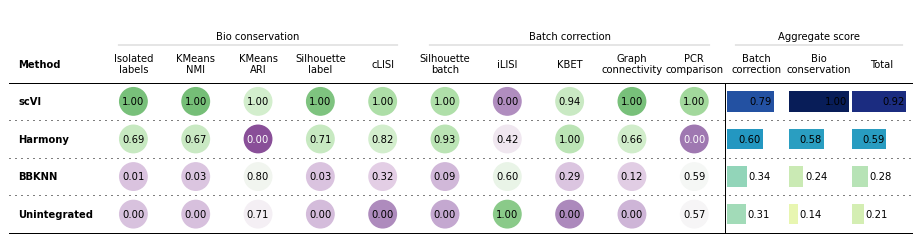

In [ ]:
bm.plot_results_table()

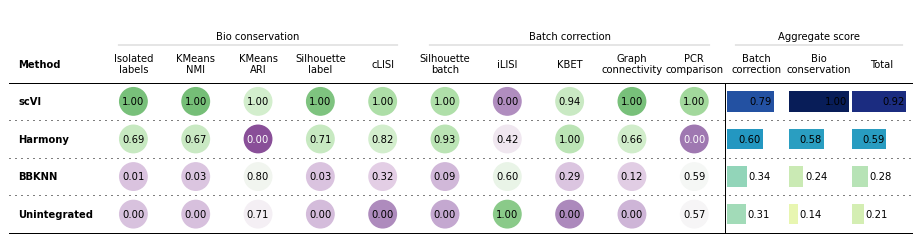

In [ ]:
bm.plot_results_table(save_dir='/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_results/4_int_method_comparison/')

In [ ]:
df = bm.get_results()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Isolated labels,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,,,,,
Unintegrated,0.0,0.0,0.711185,0.0,0.0,0.0,1.0,0.0,0.0,0.568544,0.313709,0.142237,0.210826
scVI,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.937739,1.0,1.0,0.787548,1.0,0.915019
BBKNN,0.008726,0.029412,0.800481,0.034072,0.319774,0.092202,0.603161,0.294711,0.123862,0.5903,0.340847,0.238493,0.279435
Harmony,0.692695,0.668377,0.0,0.71173,0.823181,0.933506,0.416354,1.0,0.658476,0.0,0.601667,0.579197,0.588185
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [ ]:
df.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/healthy_analysis/integration_benchmarking/fulladata_results_4_int_methods.csv')

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


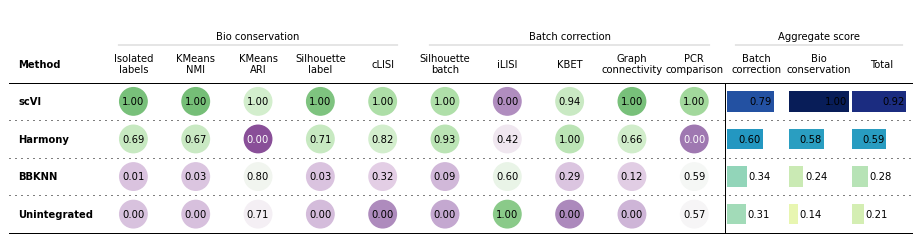

In [ ]:
bm.plot_results_table()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

                                                                                             

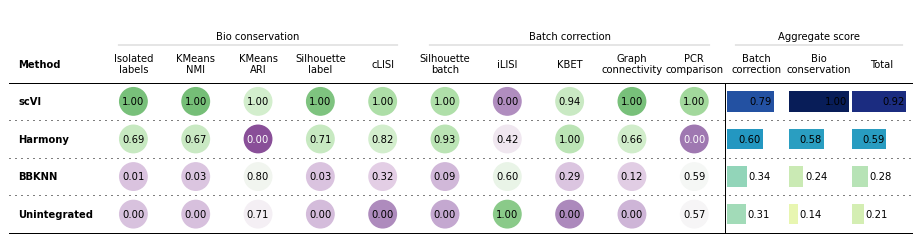

In [ ]:
bm.plot_results_table()

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


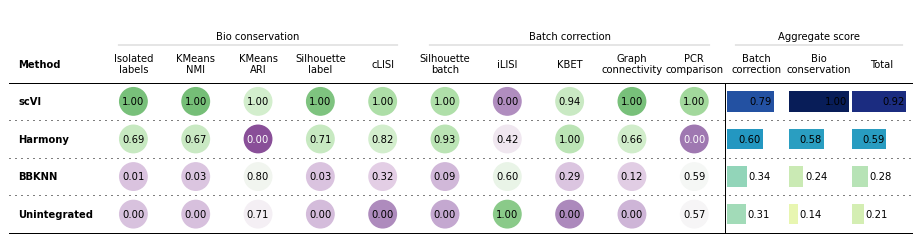

In [29]:
bm.plot_results_table()

In [40]:
df

/home/jovyan/my-conda-envs/standard_scib/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Isolated labels,KMeans NMI,KMeans ARI,Silhouette label,cLISI,Silhouette batch,iLISI,KBET,Graph connectivity,PCR comparison,Batch correction,Bio conservation,Total
Embedding,,,,,,,,,,,,,
Unintegrated,0.0,0.0,0.711185,0.0,0.0,0.0,1.0,0.0,0.0,0.568544,0.313709,0.142237,0.210826
scVI,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.937739,1.0,1.0,0.787548,1.0,0.915019
BBKNN,0.008726,0.029412,0.800481,0.034072,0.319774,0.092202,0.603161,0.294711,0.123862,0.5903,0.340847,0.238493,0.279435
Harmony,0.692695,0.668377,0.0,0.71173,0.823181,0.933506,0.416354,1.0,0.658476,0.0,0.601667,0.579197,0.588185
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Batch correction,Batch correction,Batch correction,Batch correction,Aggregate score,Aggregate score,Aggregate score
